# 4. K-Means Variation

Import required libraries again.

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

ModuleNotFoundError: No module named 'pandas'

Import our data

In [65]:
index95 = pd.read_csv('data/index_95.csv')
index100 = pd.read_csv('data/index_100.csv')
index150 = pd.read_csv('data/index_150.csv')
win95 = pd.read_csv('data/wi_95.csv')
win100 = pd.read_csv('data/wi_100.csv')
win150 = pd.read_csv('data/wi_150.csv')
loss95 = pd.read_csv('data/lo_95.csv')
loss100 = pd.read_csv('data/lo_100.csv')
loss150 = pd.read_csv('data/lo_150.csv')
choice95 = pd.read_csv('data/choice_95.csv')
choice100 = pd.read_csv('data/choice_100.csv')
choice150 = pd.read_csv('data/choice_150.csv')

cleaned95 = pd.read_csv('data/cleaned95.csv', index_col='Unnamed: 0')
cleaned100 = pd.read_csv('data/cleaned100.csv', index_col='Unnamed: 0')
cleaned150 = pd.read_csv('data/cleaned150.csv', index_col='Unnamed: 0')
joined = pd.read_csv('data/cleaned_all.csv', index_col='Unnamed: 0')
standard = pd.read_csv('data/standardized_all.csv', index_col='Unnamed: 0')

In [66]:
standard.head()

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber
0,1.044988,1.062672,1.234405,2.271920,-1.60938
1,-0.414346,-0.804770,1.234405,-0.410317,-1.60938
2,-0.474318,-0.559054,1.234405,0.268730,-1.60938
3,-0.294400,-0.559054,1.234405,0.370587,-1.60938
4,0.205371,-0.165908,1.234405,1.049635,-1.60938


In [63]:
joined.head(6)

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber
Subj_1,1150,71,4,3.400000,0
Subj_2,-675,33,4,2.568421,0
Subj_3,-750,38,4,2.778947,0
Subj_4,-525,38,4,2.810526,0
Subj_5,100,46,4,3.021053,0
Subj_6,1250,51,4,3.221053,0


## Methodology
We are going to attempt to follow the methods stated in {cite:p}`LinPP` in his attempt at constructing a privacy preserving clustering technique based on the k-means algorithm. This involves a 2 step process which is as follows:

1. Data Protection Phase and
2. Data Recovery Phase

The first phase involving the data protection phase involves 4 key steps. Firstly, we apply the K-means algorithm on our dataset and then we select one of the clusters from the result. In our cluster let's say A, we select the furthest data point away from the centroid of A. We generate the set of noises by the using the following equation:

$$
 n_i^u = d^{u} + \alpha \times (distance(c,d))
$$

In [67]:
kmeans_margin_joined = KMeans(n_clusters=3).fit(standard[["Margin", "Most Common Choice Picked"]])
centroids_betas_joined = kmeans_margin_joined.cluster_centers_

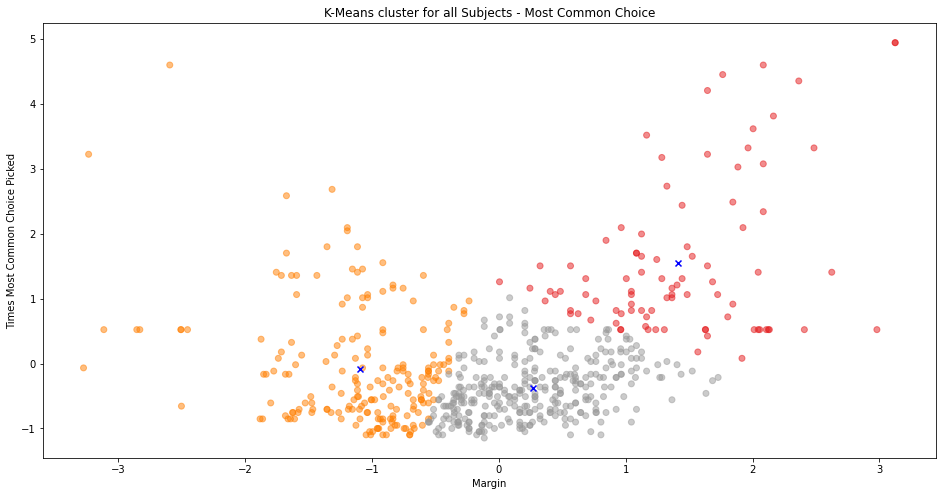

In [68]:
plt.figure(figsize=(16,8))
plt.scatter(standard['Margin'], standard['Most Common Choice Picked'], c= kmeans_margin_joined.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas_joined[:, 0], centroids_betas_joined[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for all Subjects - Most Common Choice')
plt.xlabel('Margin')
plt.ylabel('Times Most Common Choice Picked')
plt.show()